In [40]:
%pylab inline
#from ctypes import" *
import ctypes
import os
PSH=ctypes.cdll.LoadLibrary('pshmf.so')


Populating the interactive namespace from numpy and matplotlib


In [41]:
redshift = 0.45
M    = 10.**np.arange(11,15.5,0.01)/1e10
zz   = redshift*np.ones(M.shape[0],dtype=np.double)
DZ   = np.zeros(M.shape[0],dtype=np.double)
sigm = np.zeros(M.shape[0],dtype=np.double)

In [42]:
PSH.prepare()
PSH.main_power.restype = None
PSH.main_power(ctypes.c_int(M.shape[0]),
               numpy.ctypeslib.as_ctypes(zz),
               numpy.ctypeslib.as_ctypes(M),
               numpy.ctypeslib.as_ctypes(DZ),
               numpy.ctypeslib.as_ctypes(sigm))

In [43]:
def PS(sigma):
    return np.sqrt(2./np.pi)*dc/sigma*np.exp(-dc**2./2/sigma**2.)
def ST(sigma):
    A,a,p=0.3222,0.707,0.3
    return A*np.sqrt(2*a/np.pi)*(1+(sigma**2/a/dc**2)**p)*dc/sigma*np.exp(-a*dc**2./2/sigma**2.)

median_m = lambda x:0.5*(x[1:]+x[:-1])
myc,ls = ['indianred','orange','teal','steelblue','maroon','coral','purple'],['-.','--','-']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


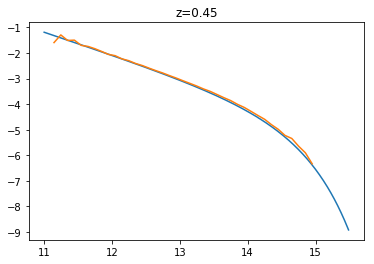

In [46]:
dc = 1.686*DZ[0] #dc/DZ DZ-growth factor at redshift z
fst   = ST(sigm)
dm    = M[1:]-M[:-1]
dlnsm = np.log(sigm[1:])-np.log(sigm[:-1])
plt.plot(np.log10(median_m(M)*1e10),np.log10(-np.log(10)*median_m(fst)*dlnsm/dm*7.43834e-09*1e9),label='S-T',alpha=1)
xsimu = np.loadtxt('../data/w_1/fofmassfunc'+np.str(redshift)+'.dat')
plt.plot(xsimu[:,0],np.log10(xsimu[:,1]))
plt.title('z='+np.str(redshift))